Cristiano Colpo cristiano.colpo@studenti.unipd.it 2017898


Mattia Sandri mattia.sandri.1@studenti.unipd.it 2021425

# Final project MANAGEMENT AND ANALYSIS OF PHYSICS DATASET 
## Anomaly detection and Predictive maintence for industrial devices

### Predictive Maintenance: Task 1
Convert the alarms from their integer encoding to their bit string and then identify
correctly the required alarms

In [1]:
from dask.distributed import Client
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [2]:
client = Client(n_workers=1)
client

/home/mattia/.local/lib/python3.8/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 32931 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:32931/status,
Dashboard: http://127.0.0.1:32931/status,Workers: 1
Total threads: 8,Total memory: 15.57 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37119,Workers: 1
Dashboard: http://127.0.0.1:32931/status,Total threads: 8
Started: Just now,Total memory: 15.57 GiB
Comm: tcp://192.168.0.158:41655,Total threads: 8
Dashboard: http://192.168.0.158:35515/status,Memory: 15.57 GiB
Nanny: tcp://127.0.0.1:42639,


In [3]:
df = dd.read_csv("dataset.csv").persist()
df['when']=dd.to_datetime(df.when,unit='ms')

In [4]:
dataTask1 = df[(df["metric"]=='A5')|(df["metric"]=='A9')]
A5_A9_resampled = dataTask1.set_index("when").groupby("metric").apply(lambda df: df.resample("1min").max().dropna()).compute()

<ipython-input-4-82c2d9a9912e>:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  A5_A9_resampled = dataTask1.set_index("when").groupby("metric").apply(lambda df: df.resample("1min").max().dropna()).compute()


In [5]:
A5_A9_resampled.index = A5_A9_resampled.index.droplevel(0)

In [6]:
def intToStringBin(intero):
    return ('{0:b}'.format(int(intero))).zfill(16)

In [7]:
A5_A9_resampled["value"] = A5_A9_resampled["value"].apply(intToStringBin)

In [8]:
A5_A9_resampled_copy = A5_A9_resampled.copy()

A5_A9_resampled_copy["value"] = A5_A9_resampled["value"].apply(list)

In [9]:
alarm_sensors = pd.DataFrame([x for x in A5_A9_resampled_copy.value], columns =["Sensor "+str(i) for i in range(16)])
alarm_sensors.index = A5_A9_resampled_copy.index
alarm_sensors["metric"] = A5_A9_resampled_copy.metric
alarm_sensors["hwid"] = A5_A9_resampled_copy.hwid

In [10]:
alarm_sensors = alarm_sensors.sort_index()

In [11]:
alarm_sensors_A5 = alarm_sensors.loc[alarm_sensors["metric"]=="A5"]
alarm_sensors_A9 = alarm_sensors.loc[alarm_sensors["metric"]=="A9"]

Text(0.5, 1.0, 'Sensor 15')

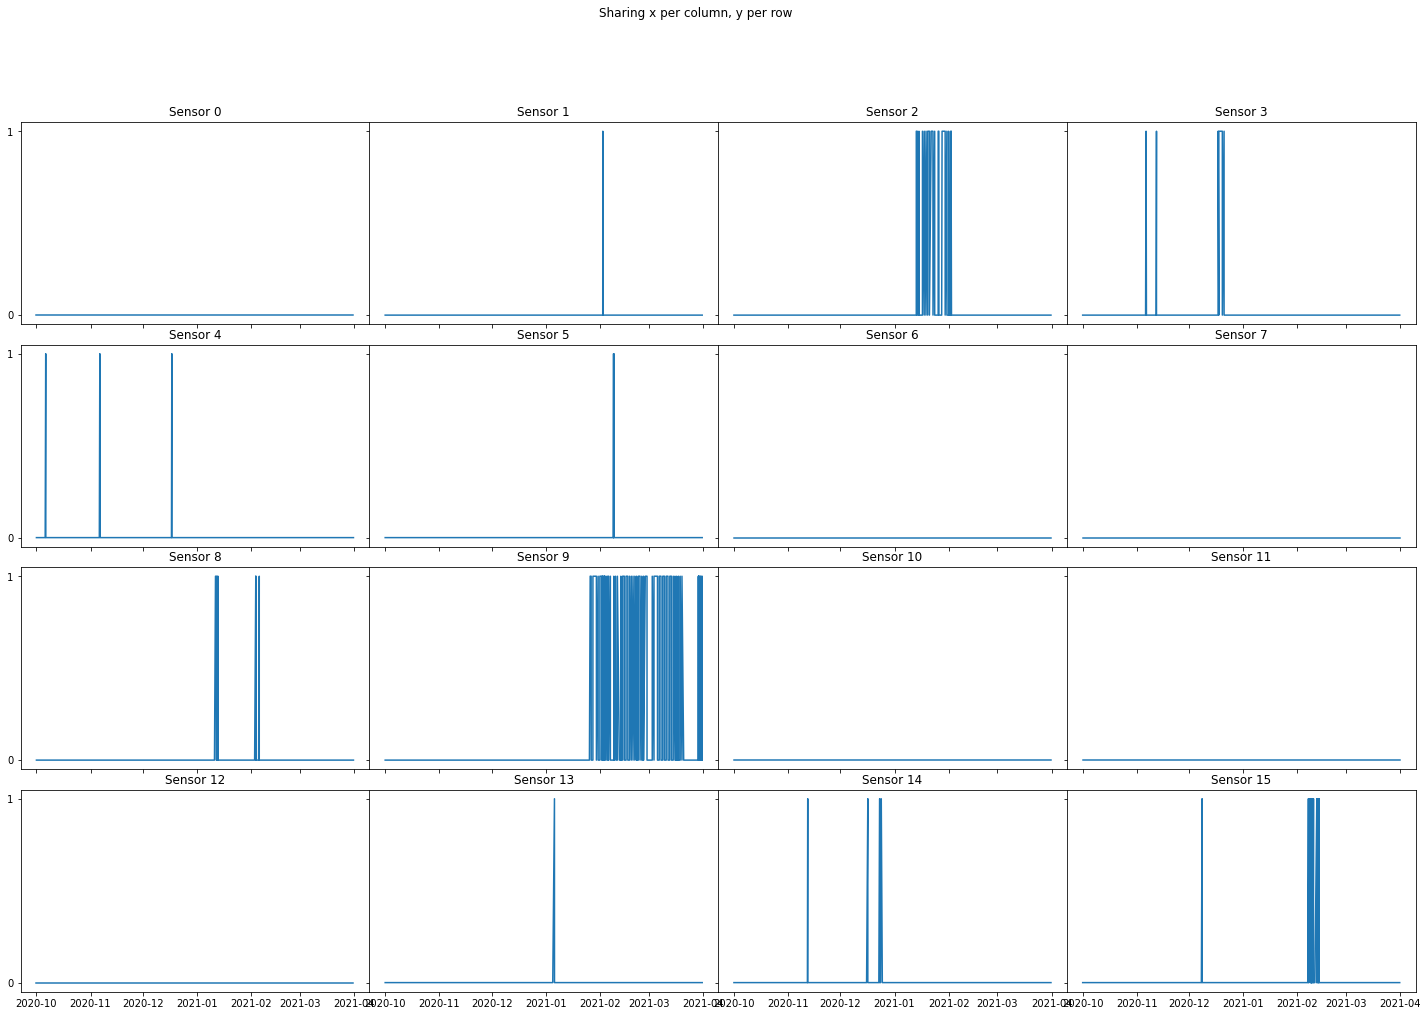

In [12]:
fig = plt.figure(figsize=(25,16))
gs = fig.add_gridspec(4, 4, hspace=0.1, wspace=0)
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(alarm_sensors_A9["Sensor 0"])
ax1.set_title("Sensor 0")
ax2.plot(alarm_sensors_A9["Sensor 1"])
ax2.set_title("Sensor 1")
ax3.plot(alarm_sensors_A9["Sensor 2"])
ax3.set_title("Sensor 2")
ax4.plot(alarm_sensors_A9["Sensor 3"])
ax4.set_title("Sensor 3")
ax5.plot(alarm_sensors_A9["Sensor 4"])
ax5.set_title("Sensor 4")
ax6.plot(alarm_sensors_A9["Sensor 5"])
ax6.set_title("Sensor 5")
ax7.plot(alarm_sensors_A9["Sensor 6"])
ax7.set_title("Sensor 6")
ax8.plot(alarm_sensors_A9["Sensor 7"])
ax8.set_title("Sensor 7")
ax9.plot(alarm_sensors_A9["Sensor 8"])
ax9.set_title("Sensor 8")
ax10.plot(alarm_sensors_A9["Sensor 9"])
ax10.set_title("Sensor 9")
ax11.plot(alarm_sensors_A9["Sensor 10"])
ax11.set_title("Sensor 10")
ax12.plot(alarm_sensors_A9["Sensor 11"])
ax12.set_title("Sensor 11")
ax13.plot(alarm_sensors_A9["Sensor 12"])
ax13.set_title("Sensor 12")
ax14.plot(alarm_sensors_A9["Sensor 13"])
ax14.set_title("Sensor 13")
ax15.plot(alarm_sensors_A9["Sensor 14"])
ax15.set_title("Sensor 14")
ax16.plot(alarm_sensors_A9["Sensor 15"])
ax16.set_title("Sensor 15")

Text(0.5, 1.0, 'Sensor 15')

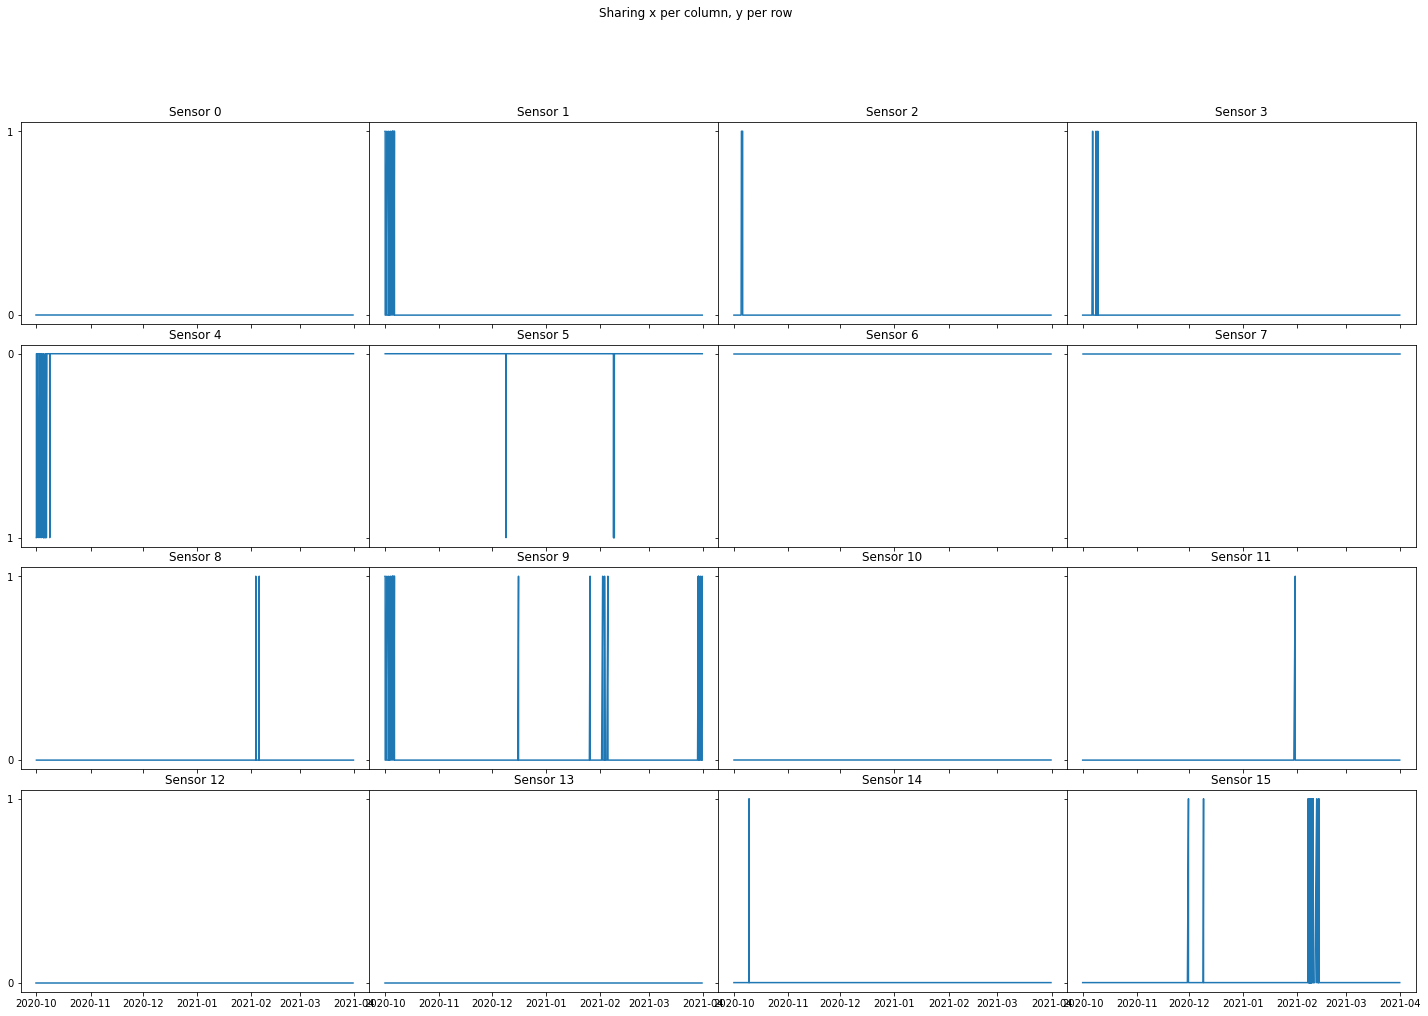

In [13]:
fig = plt.figure(figsize=(25,16))
gs = fig.add_gridspec(4, 4, hspace=0.1, wspace=0)
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(alarm_sensors_A5["Sensor 0"])
ax1.set_title("Sensor 0")
ax2.plot(alarm_sensors_A5["Sensor 1"])
ax2.set_title("Sensor 1")
ax3.plot(alarm_sensors_A5["Sensor 2"])
ax3.set_title("Sensor 2")
ax4.plot(alarm_sensors_A5["Sensor 3"])
ax4.set_title("Sensor 3")
ax5.plot(alarm_sensors_A5["Sensor 4"])
ax5.set_title("Sensor 4")
ax6.plot(alarm_sensors_A5["Sensor 5"])
ax6.set_title("Sensor 5")
ax7.plot(alarm_sensors_A5["Sensor 6"])
ax7.set_title("Sensor 6")
ax8.plot(alarm_sensors_A5["Sensor 7"])
ax8.set_title("Sensor 7")
ax9.plot(alarm_sensors_A5["Sensor 8"])
ax9.set_title("Sensor 8")
ax10.plot(alarm_sensors_A5["Sensor 9"])
ax10.set_title("Sensor 9")
ax11.plot(alarm_sensors_A5["Sensor 10"])
ax11.set_title("Sensor 10")
ax12.plot(alarm_sensors_A5["Sensor 11"])
ax12.set_title("Sensor 11")
ax13.plot(alarm_sensors_A5["Sensor 12"])
ax13.set_title("Sensor 12")
ax14.plot(alarm_sensors_A5["Sensor 13"])
ax14.set_title("Sensor 13")
ax15.plot(alarm_sensors_A5["Sensor 14"])
ax15.set_title("Sensor 14")
ax16.plot(alarm_sensors_A5["Sensor 15"])
ax16.set_title("Sensor 15")

### Predictive Maintenance: Task 2
Once the alarms have been identified find some possible correlation between the variables and those alarms.

We select the sensors with °C, %, bar, V as UDM, because these sensors we know how the method (mean) to reseample.

In [14]:
condition =(
    (df["metric"]=="P10")|
    (df["metric"]=="P16")|
    (df["metric"]=="P17")|
    (df["metric"]=="P18")|
    (df["metric"]=="P5")|
    (df["metric"]=="P6")|
    (df["metric"]=="P7")|
    (df["metric"]=="P8")|
    (df["metric"]=="P9")|
    (df["metric"]=="S10")|
    (df["metric"]=="S100")|
    (df["metric"]=="S101")|
    (df["metric"]=="S102")|
    (df["metric"]=="S106")|
    (df["metric"]=="S107")|
    (df["metric"]=="S108")|
    (df["metric"]=="S109")|
    (df["metric"]=="S110")|
    (df["metric"]=="S122")|
    (df["metric"]=="S124")|
    (df["metric"]=="S125")|
    (df["metric"]=="S128")|
    (df["metric"]=="S129")|
    (df["metric"]=="S137")|
    (df["metric"]=="S143")|
    (df["metric"]=="S147")|
    (df["metric"]=="S151")|
    (df["metric"]=="S157")|
    (df["metric"]=="S158")|
    (df["metric"]=="S159")|
    (df["metric"]=="S163")|
    (df["metric"]=="S164")|
    (df["metric"]=="S165")|
    (df["metric"]=="S166")|
    (df["metric"]=="S167")|
    (df["metric"]=="S178")|
    (df["metric"]=="S180")|
    (df["metric"]=="S181")|
    (df["metric"]=="S19")|
    (df["metric"]=="S3")|
    (df["metric"]=="S37")|
    (df["metric"]=="S39")|
    (df["metric"]=="S40")|
    (df["metric"]=="S41")|
    (df["metric"]=="S42")|
    (df["metric"]=="S43")|
    (df["metric"]=="S45")|
    (df["metric"]=="S46")|
    (df["metric"]=="S47")|
    (df["metric"]=="S49")|
    (df["metric"]=="S50")|
    (df["metric"]=="S6")|
    (df["metric"]=="S69")|
    (df["metric"]=="S70")|
    (df["metric"]=="S71")|
    (df["metric"]=="S72")|
    (df["metric"]=="S80")|
    (df["metric"]=="S86")|
    (df["metric"]=="S9")|
    (df["metric"]=="S90")|
    (df["metric"]=="S94"))

I do not want variabiles with only one value

In [15]:
dataTask2 = df[condition].groupby("metric")
unique_calc = dataTask2.value.unique().compute()
unique = np.array(unique_calc.index[unique_calc.apply(len)> 1])

In [16]:
condition2 = (
(df["metric"]=='P10')| 
(df["metric"]=='P16')| 
(df["metric"]=='P17')| 
(df["metric"]=='P18')| 
(df["metric"]=='P5')|
(df["metric"]=='P6')|
(df["metric"]=='P7')|
(df["metric"]=='P8')|
(df["metric"]=='P9')|
(df["metric"]=='S10')|
(df["metric"]=='S100')|
(df["metric"]=='S101')| 
(df["metric"]=='S102')| 
(df["metric"]=='S107')| 
(df["metric"]=='S109')| 
(df["metric"]=='S122')| 
(df["metric"]=='S124')| 
(df["metric"]=='S125')| 
(df["metric"]=='S128')| 
(df["metric"]=='S129')|
(df["metric"]=='S137')| 
(df["metric"]=='S143')| 
(df["metric"]=='S147')| 
(df["metric"]=='S151')| 
(df["metric"]=='S157')| 
(df["metric"]=='S158')| 
(df["metric"]=='S159')|
(df["metric"]=='S164')|
(df["metric"]=='S166')|
(df["metric"]=='S178')|
(df["metric"]=='S180')|
(df["metric"]=='S181')|
(df["metric"]=='S3')|
(df["metric"]=='S37')|
(df["metric"]=='S39')|
(df["metric"]=='S40')|
(df["metric"]=='S41')|
(df["metric"]=='S46')|
(df["metric"]=='S47')|
(df["metric"]=='S6')|
(df["metric"]=='S70')|
(df["metric"]=='S71')|
(df["metric"]=='S72')|
(df["metric"]=='S80')|
(df["metric"]=='S86')| 
(df["metric"]=='S9')|
(df["metric"]=='S90')| 
(df["metric"]=='S94')
)

In [17]:
dataTask2 = (df[condition2].set_index("when")
            .groupby("metric")
            .apply(lambda df: df.resample("1min").mean())
            ).compute()
dataTask2 = dataTask2.reset_index()
dataTask2 = dd.from_pandas(dataTask2, npartitions=4).set_index("when")

<ipython-input-17-de391b8381cc>:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  dataTask2 = (df[condition2].set_index("when")


Based on these sensors we can see if there is overheating, in column fault we have 1 if there is overheating.

In [18]:
def f(row):
    if ((row['Sensor 6'] =="1") | (row['Sensor 7'] =="1") | (row['Sensor 8'] =="1")):
        val = 1
    else:
        val = 0
    return val
alarm_sensors_A5["fault"] = alarm_sensors_A5.apply(f,axis=1)
alarm_sensors_A9["fault"] = alarm_sensors_A9.apply(f,axis=1)

<ipython-input-18-ba793115873e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alarm_sensors_A5["fault"] = alarm_sensors_A5.apply(f,axis=1)
<ipython-input-18-ba793115873e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alarm_sensors_A9["fault"] = alarm_sensors_A9.apply(f,axis=1)


There are only 11 timestamps with overheating

In [19]:
list_of_series = [alarm_sensors_A5["fault"],alarm_sensors_A9["fault"]]
cols = ["A5", "A9"]
df_fault = pd.concat(list_of_series, axis=1)
fault = df_fault.sum(axis=1)
fault[fault==2.0] = 1.0
fault.loc[fault==1.0]

when
2021-01-11 14:11:00    1.0
2021-01-12 00:07:00    1.0
2021-01-12 00:08:00    1.0
2021-01-12 12:24:00    1.0
2021-01-13 00:10:00    1.0
2021-02-03 16:09:00    1.0
2021-02-03 16:10:00    1.0
2021-02-03 16:51:00    1.0
2021-02-03 16:52:00    1.0
2021-02-05 15:55:00    1.0
2021-02-05 15:56:00    1.0
dtype: float64

In [20]:
fault = pd.DataFrame(fault, columns=["fault"]).dropna()
fault

,fault
when,
2020-10-01 00:06:00,0.0
2020-10-01 00:07:00,0.0
2020-10-01 00:14:00,0.0
2020-10-01 00:16:00,0.0
2020-10-01 08:06:00,0.0
...,...
2021-03-31 00:29:00,0.0
2021-03-31 14:44:00,0.0
2021-03-31 14:56:00,0.0


In [21]:
sensors = dataTask2.metric.unique().compute()

In [22]:
sensorNameCorr = {}
fault_dd = dd.from_pandas(fault ,npartitions=1)
for sensorName in sensors:
    corrCoeff = fault_dd.fault.corr(dataTask2.loc[dataTask2["metric"]==sensorName].value).compute()
    sensorNameCorr[sensorName] = corrCoeff

In [116]:
sensorNameCorr

{'P17': 0.10420301388274987,
 'S46': 0.08167720881711393,
 'S147': -0.0731500800954839,
 'S158': 0.03675959646929441,
 'S41': -0.04843131681598142,
 'S128': 0.13280233973186942,
 'S122': -0.08527801746719857,
 'S86': -0.09123267790666365,
 'P5': 0.00012166979483679468,
 'P9': -0.008150941387854053,
 'P8': 0.008237908938048795,
 'S157': 0.04333089701316206,
 'S3': -0.018851613516938773,
 'S10': -0.11110679699416383,
 'S80': 0.02449360576856097,
 'P6': 0.022307506659304633,
 'S47': 0.08610412811620051,
 'S180': 0.08545518032219095,
 'P16': 0.023810551312662933,
 'S37': -0.15613430347460752,
 'S9': -0.09184202898583023,
 'S39': 0.002655908454967262,
 'S101': 0.04541806930123482,
 'S166': -0.008351772791201454,
 'S124': -0.0662214355935204,
 'S143': -0.007910620219741602,
 'S178': -0.06899875121095295,
 'S102': -0.08969143143933662,
 'S72': 0.04296787033362624,
 'S70': -0.18732615326721272,
 'S100': 0.060200089381927724,
 'S151': 0.023253539575764193,
 'P18': 0.012367140804995356,
 'S109':

### Task 3

With the figured out correlations, try to predict an alarm in the future. E.g: given
a set of correlated features (variable) at time $T_{i−1}$ try to predict if at time $T_i$ there
will a fault or not.

S128 and S70 have the highest correlation with the fault sensors, for this reason S128 was choosen to predict if there will be a fault in the future. We try to predict 1 april 2021.

In [24]:
#We select only the values of S128 that we know if are associated with overheating or not
S128 = dataTask2.loc[dataTask2["metric"]=="S128"].compute()
S128_reduced = S128.loc[fault.index]
S128_reduced

,metric,value
when,,
2020-10-01 00:06:00,S128,71.428571
2020-10-01 00:07:00,S128,71.571429
2020-10-01 00:14:00,S128,80.200000
2020-10-01 00:16:00,S128,75.333333
2020-10-01 08:06:00,S128,69.500000
...,...,...
2021-03-31 00:29:00,S128,83.000000
2021-03-31 14:44:00,S128,90.000000
2021-03-31 14:56:00,S128,63.333333


In [25]:
dfs = [fault, S128_reduced]
dataframe_fault_value = pd.concat(dfs,axis=1)
dataframe_fault_value

,fault,metric,value
when,,,
2020-10-01 00:06:00,0.0,S128,71.428571
2020-10-01 00:07:00,0.0,S128,71.571429
2020-10-01 00:14:00,0.0,S128,80.200000
2020-10-01 00:16:00,0.0,S128,75.333333
2020-10-01 08:06:00,0.0,S128,69.500000
...,...,...,...
2021-03-31 00:29:00,0.0,S128,83.000000
2021-03-31 14:44:00,0.0,S128,90.000000
2021-03-31 14:56:00,0.0,S128,63.333333


Unbalanced dataset with 752 values with fault equal to zero and 11 values with one. Maybe is better to select a
subset of the values equals to zero, we tried with 100 values with fault 0 and 11 values with 1.

In [26]:
rows_0 = np.random.choice(dataframe_fault_value[dataframe_fault_value.fault==0].index.values, 100)
rows_1 = dataframe_fault_value[dataframe_fault_value.fault==1].index.values
equalized_dataframe_fault_value = dataframe_fault_value.loc[np.concatenate((rows_0,rows_1))].sort_index()
equalized_dataframe_fault_value

,fault,metric,value
when,,,
2020-10-01 00:06:00,0.0,S128,71.428571
2020-10-02 08:01:00,0.0,S128,64.333333
2020-10-02 21:34:00,0.0,S128,88.000000
2020-10-02 23:00:00,0.0,S128,72.666667
2020-10-03 00:51:00,0.0,S128,70.000000
...,...,...,...
2021-03-15 00:09:00,0.0,S128,53.333333
2021-03-15 00:16:00,0.0,S128,54.000000
2021-03-22 00:15:00,0.0,S128,50.500000


Firstly we train a classification model in order to see if there is overheating by knowing the output of S128.
We need a model such a RNN that can predict the label by exploiting temporal information, but instead of using a delta-t of samples, for the sake of semplicity we use a simple MLPclassifier with single samples, the results are obviously worse.

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler_for_SVM = StandardScaler() # we rescale the inputs for the neural network
X = np.array(equalized_dataframe_fault_value.value).reshape(-1, 1)
y = np.array(equalized_dataframe_fault_value.fault).reshape(-1, 1)
X = scaler_for_SVM.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


clf = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000,
                     solver='adam', verbose=10, learning_rate_init=0.0001)
clf.fit(X_train, y_train)

/home/mattia/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.60752550
Iteration 2, loss = 0.60497267
Iteration 3, loss = 0.60243206
Iteration 4, loss = 0.59990834
Iteration 5, loss = 0.59740350
Iteration 6, loss = 0.59491917
Iteration 7, loss = 0.59244971
Iteration 8, loss = 0.58999650
Iteration 9, loss = 0.58756181
Iteration 10, loss = 0.58514269
Iteration 11, loss = 0.58274001
Iteration 12, loss = 0.58036554
Iteration 13, loss = 0.57801375
Iteration 14, loss = 0.57568171
Iteration 15, loss = 0.57337061
Iteration 16, loss = 0.57107580
Iteration 17, loss = 0.56880038
Iteration 18, loss = 0.56654275
Iteration 19, loss = 0.56430785
Iteration 20, loss = 0.56209085
Iteration 21, loss = 0.55988962
Iteration 22, loss = 0.55770472
Iteration 23, loss = 0.55553564
Iteration 24, loss = 0.55338455
Iteration 25, loss = 0.55124986
Iteration 26, loss = 0.54913727
Iteration 27, loss = 0.54705000
Iteration 28, loss = 0.54498450
Iteration 29, loss = 0.54293323
Iteration 30, loss = 0.54089773
Iteration 31, loss = 0.53888360
Iteration 32, los

Iteration 324, loss = 0.26753379
Iteration 325, loss = 0.26729281
Iteration 326, loss = 0.26705399
Iteration 327, loss = 0.26681963
Iteration 328, loss = 0.26658697
Iteration 329, loss = 0.26635601
Iteration 330, loss = 0.26612668
Iteration 331, loss = 0.26589914
Iteration 332, loss = 0.26567342
Iteration 333, loss = 0.26544920
Iteration 334, loss = 0.26522787
Iteration 335, loss = 0.26500870
Iteration 336, loss = 0.26479033
Iteration 337, loss = 0.26457318
Iteration 338, loss = 0.26435910
Iteration 339, loss = 0.26414679
Iteration 340, loss = 0.26393566
Iteration 341, loss = 0.26372740
Iteration 342, loss = 0.26352074
Iteration 343, loss = 0.26331428
Iteration 344, loss = 0.26311154
Iteration 345, loss = 0.26291031
Iteration 346, loss = 0.26271015
Iteration 347, loss = 0.26251165
Iteration 348, loss = 0.26231456
Iteration 349, loss = 0.26211879
Iteration 350, loss = 0.26192474
Iteration 351, loss = 0.26173239
Iteration 352, loss = 0.26154085
Iteration 353, loss = 0.26135169
Iteration 

MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.0001,
              max_iter=1000, verbose=10)

In [28]:
clf.score(X_test, y_test)

0.782608695652174

In [29]:
clf.predict(X_train)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

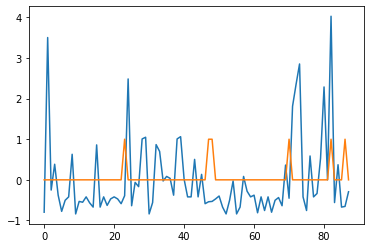

In [30]:
plt.plot(X_train)
plt.plot(y_train)

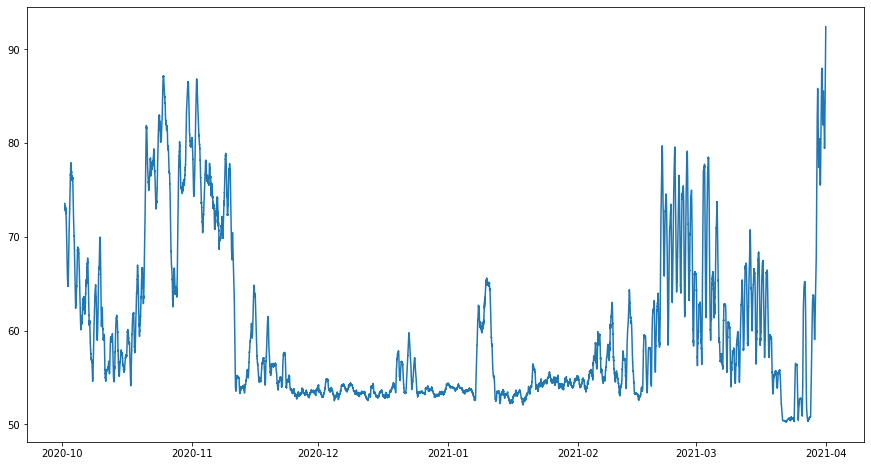

In [31]:
S128 = S128.dropna()
plt.figure(figsize=(15,8))
plt.plot(S128.rolling(window=1000).mean().dropna())

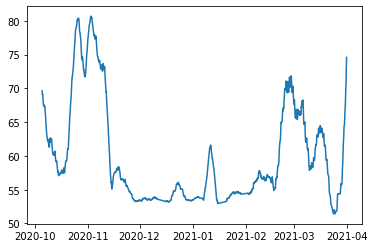

In [32]:
S128_resampled = S128.resample("1h").mean()
S128_resampled
plt.plot(S128_resampled.rolling(window=100).mean().dropna())

Now we train a MLPRegressor in order to predict a value of S128 in the future (1 april 2021), we convert the timestamp into julian date and then rescale.

In [33]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

X = np.array(S128_resampled.rolling(window=100).mean().dropna().index.to_julian_date())
y = np.array(S128_resampled.rolling(window=100).mean().dropna().value)

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.1)
scaled_X = scaler.fit_transform(X.reshape(-1, 1))
regr = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(scaled_X, y.reshape(-1, 1))

/home/mattia/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


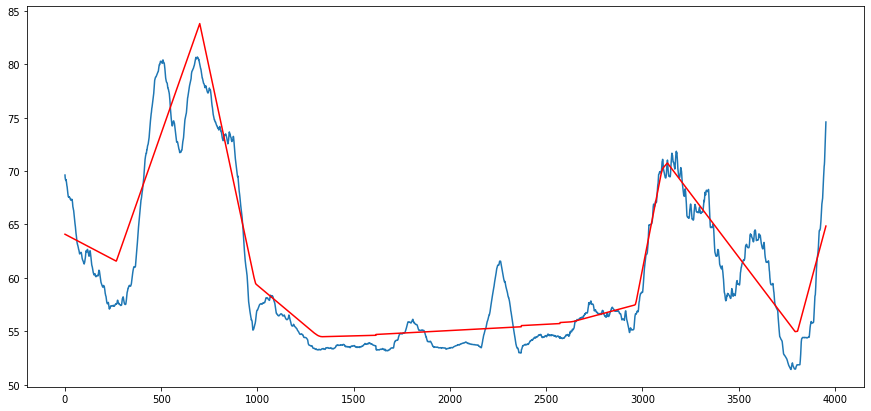

In [34]:
plt.figure(figsize=(15,7))
plt.plot(y)
plt.plot(regr.predict(scaled_X),"r")

In [35]:
#"2021-03-31 24:00:00"
#2459305.5
primo_aprile = pd.Timestamp('2021-04-01').to_julian_date()
primo_aprile_scalato = scaler.transform(np.array(primo_aprile).reshape(-1,1))
predict_primo_aprile = regr.predict(primo_aprile_scalato)

In [36]:
predict_primo_aprile

array([64.91684901])

Will there be anomaly on April 1st 00:00 ?

In [37]:
(clf.predict([predict_primo_aprile,]) == 1)[0]

True